In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
import io

In [3]:
from google.colab import files
uploaded = files.upload()

Saving CAT.csv to CAT.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['CAT.csv']))
print(df)

          Date        Open        High         Low       Close   Adj Close
0     2/8/2023  248.100006  251.559998  247.080002  248.869995  243.910446
1     2/9/2023  250.000000  251.970001  245.479996  246.279999  241.372070
2    2/10/2023  246.279999  248.630005  244.639999  247.669998  242.734344
3    2/13/2023  243.500000  248.380005  242.649994  248.149994  243.204803
4    2/14/2023  247.009995  247.309998  241.649994  244.360001  239.490326
..         ...         ...         ...         ...         ...         ...
246   2/1/2024  303.239990  308.070007  301.940002  307.690002  307.690002
247   2/2/2024  307.000000  317.369995  306.000000  315.089996  315.089996
248   2/5/2024  334.869995  334.869995  315.910004  321.399994  321.399994
249   2/6/2024  323.190002  327.429993  319.070007  322.720001  322.720001
250   2/7/2024  322.940002  327.820007  321.100006  323.589996  323.589996

[251 rows x 6 columns]


In [5]:
data_training = df[df['Date'] < '2020-03-15'].copy()
data_testing = df[df['Date'] >= '2020-03-15'].copy()

In [6]:
data_training = data_training.drop(['Date'], axis = 1)

In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.20945705, 0.20147613, 0.23957268, 0.23395524, 0.19174693],
       [0.2267675 , 0.205406  , 0.22313539, 0.20740207, 0.16599816],
       [0.19287536, 0.17339223, 0.21450587, 0.22165262, 0.17981679],
       [0.16754738, 0.17099599, 0.19406202, 0.22657364, 0.18458903],
       [0.1995262 , 0.16074   , 0.18378875, 0.18771785, 0.14691014],
       [0.1739249 , 0.17473412, 0.20002053, 0.23221238, 0.19005686],
       [0.19487974, 0.17243368, 0.21327313, 0.20986265, 0.16838414],
       [0.20727042, 0.19476668, 0.22467647, 0.22288283, 0.18101001],
       [0.17665816, 0.16735365, 0.1642696 , 0.15029737, 0.11062319],
       [0.14650147, 0.11204833, 0.1300596 , 0.12138607, 0.08258767],
       [0.14176383, 0.09862943, 0.1216356 , 0.12200118, 0.08318421],
       [0.09220113, 0.05894766, 0.09513055, 0.10375226, 0.06548813],
       [0.12745997, 0.1026551 , 0.15368815, 0.14281314, 0.10336577],
       [0.14422378, 0.10121741, 0.15358548, 0.13840477, 0.09909084],
       [0.43303587, 0.44349664, 0.

In [8]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-20:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train.shape

(43, 20, 5)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [11]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 80, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 120, activation = 'relu'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units = 1))

In [12]:
regressorGRU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 20, 60)            12060     
                                                                 
 dropout (Dropout)           (None, 20, 60)            0         
                                                                 
 gru_1 (GRU)                 (None, 20, 60)            21960     
                                                                 
 dropout_1 (Dropout)         (None, 20, 60)            0         
                                                                 
 gru_2 (GRU)                 (None, 20, 80)            34080     
                                                                 
 dropout_2 (Dropout)         (None, 20, 80)            0         
                                                                 
 gru_3 (GRU)                 (None, 120)               7

In [13]:
regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressorGRU.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
2/2 [==============================] - 6s 52ms/step - loss: 0.3743
Epoch 2/50
2/2 [==============================] - 0s 43ms/step - loss: 0.3041
Epoch 3/50
2/2 [==============================] - 0s 45ms/step - loss: 0.2305
Epoch 4/50
2/2 [==============================] - 0s 50ms/step - loss: 0.1337
Epoch 5/50
2/2 [==============================] - 0s 48ms/step - loss: 0.0542
Epoch 6/50
2/2 [==============================] - 0s 46ms/step - loss: 0.0173
Epoch 7/50
2/2 [==============================] - 0s 48ms/step - loss: 0.0671
Epoch 8/50
2/2 [==============================] - 0s 49ms/step - loss: 0.0350
Epoch 9/50
2/2 [==============================] - 0s 49ms/step - loss: 0.0135
Epoch 10/50
2/2 [==============================] - 0s 51ms/step - loss: 0.0176
Epoch 11/50
2/2 [==============================] - 0s 51ms/step - loss: 0.0254
Epoch 12/50
2/2 [==============================] - 0s 47ms/step - loss: 0.0230
Epoch 13/50
2/2 [==============================] - 0s 45ms/st

In [14]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close
14,3/1/2023,242.009995,249.699997,241.570007,248.669998,243.714432
15,3/2/2023,246.509995,252.490005,246.130005,252.179993,247.154480
16,3/3/2023,252.389999,255.399994,249.910004,255.309998,250.222107
17,3/6/2023,255.649994,255.699997,251.580002,253.979996,248.918610
18,3/7/2023,254.050003,254.750000,245.949997,246.139999,241.234863


In [15]:
past_20_days = data_testing.tail(20)

In [16]:
df = past_20_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-16-08f6f3976b94>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_20_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close
0,284.799988,287.070007,283.649994,286.250000,283.465240
1,286.339996,289.410004,281.380005,281.630005,278.890167
2,280.420013,284.470001,279.040009,282.899994,280.147797
3,280.929993,283.480011,277.649994,281.429993,278.692108
4,281.570007,283.390015,279.119995,282.279999,279.533875


In [17]:
inputs = scaler.transform(df)
inputs

array([[ 5.43822798e-01,  5.41838521e-01,  6.15265998e-01,
         6.17182708e-01,  5.92982676e-01],
       [ 5.57853483e-01,  5.64267324e-01,  5.91945793e-01,
         5.69817572e-01,  5.46574071e-01],
       [ 5.03917775e-01,  5.16917540e-01,  5.67906387e-01,
         5.82837760e-01,  5.59331213e-01],
       [ 5.08564095e-01,  5.07428515e-01,  5.53626391e-01,
         5.67767008e-01,  5.44565001e-01],
       [ 5.14395127e-01,  5.06565906e-01,  5.68728105e-01,
         5.76481444e-01,  5.53103713e-01],
       [ 5.41636300e-01,  5.21997565e-01,  5.77255092e-01,
         5.74123324e-01,  5.50792815e-01],
       [ 5.02460022e-01,  5.19217837e-01,  5.75919516e-01,
         5.71662897e-01,  5.48382233e-01],
       [ 5.02004310e-01,  5.00335436e-01,  5.06163945e-01,
         5.11277564e-01,  4.89216800e-01],
       [ 4.90980338e-01,  5.04552851e-01,  5.55475507e-01,
         5.79352051e-01,  5.55916101e-01],
       [ 5.17128253e-01,  4.91996559e-01,  5.50338873e-01,
         5.44391991e-01

In [18]:
x_test = []
y_test = []

for i in range(20, inputs.shape[0]):
    x_test.append(inputs[i-20:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((148, 20, 5), (148,))

In [19]:
x_test.shape

(148, 20, 5)

In [20]:
y_pred = regressorGRU.predict(x_test)

5/5 [==============================] - 1s 13ms/step


In [21]:
scaler.scale_

array([0.00911079, 0.00958497, 0.01027327, 0.0102522 , 0.0101438 ])

In [23]:
scale = 1 / 0.00911079
scale

109.75996593050657

In [24]:
y_pred = y_pred * scale
y_test = y_test * scale

In [25]:
y_pred.shape

(148, 1)

In [26]:
y_test.shape

(148,)

In [27]:
y_pred[78:]

array([[34.670662],
       [34.93473 ],
       [34.751244],
       [34.329372],
       [33.902374],
       [33.62676 ],
       [33.632042],
       [33.924618],
       [34.45191 ],
       [35.05237 ],
       [35.472744],
       [35.76455 ],
       [36.084305],
       [36.63312 ],
       [37.44487 ],
       [38.439514],
       [39.471115],
       [40.475098],
       [41.599148],
       [42.822067],
       [44.026215],
       [44.970364],
       [45.644314],
       [46.17467 ],
       [46.520664],
       [46.67255 ],
       [46.756405],
       [46.969543],
       [48.15443 ],
       [50.489582],
       [53.213318],
       [55.4985  ],
       [57.20135 ],
       [58.434834],
       [59.477856],
       [60.381516],
       [61.156807],
       [61.758827],
       [61.954643],
       [61.69949 ],
       [61.136703],
       [60.34645 ],
       [59.424923],
       [58.433865],
       [57.53339 ],
       [56.740845],
       [56.108864],
       [55.772724],
       [55.859787],
       [56.430218],


In [28]:
y_test[78:]

array([15.11999113,  9.32999861, 10.35000335, 12.36999184, 14.17998837,
       16.8299967 , 21.46000051, 20.83999067, 19.88999391, 17.63999449,
       15.07999714, 19.39998904, 24.72998868, 30.37999623, 29.44998947,
       31.37000198, 29.15999554, 32.51999568, 35.03000504, 39.06000201,
       36.63998963, 33.18997851, 34.98999605, 35.41998894, 33.85999134,
       34.8199831 , 37.63998937, 47.63998682, 62.63998298, 60.42999255,
       58.08999614, 52.0099807 , 52.88998547, 59.54998777, 59.37997381,
       58.82998596, 58.94998192, 57.40997332, 51.88998573, 51.90997472,
       47.89999675, 49.63998631, 48.82998851, 45.18997544, 46.48999311,
       46.40997613, 48.38998662, 49.88998624, 54.91998396, 58.52999903,
       59.68997174, 61.22997934, 55.30999786, 55.81997772, 56.45999156,
       59.4499818 , 55.1499949 , 55.09997591, 53.88998522, 56.75997948,
       53.9499832 , 54.96997194, 56.38998458, 51.09997693, 46.89999701,
       45.63998733, 46.03998123, 45.88998726, 48.37997663, 53.96

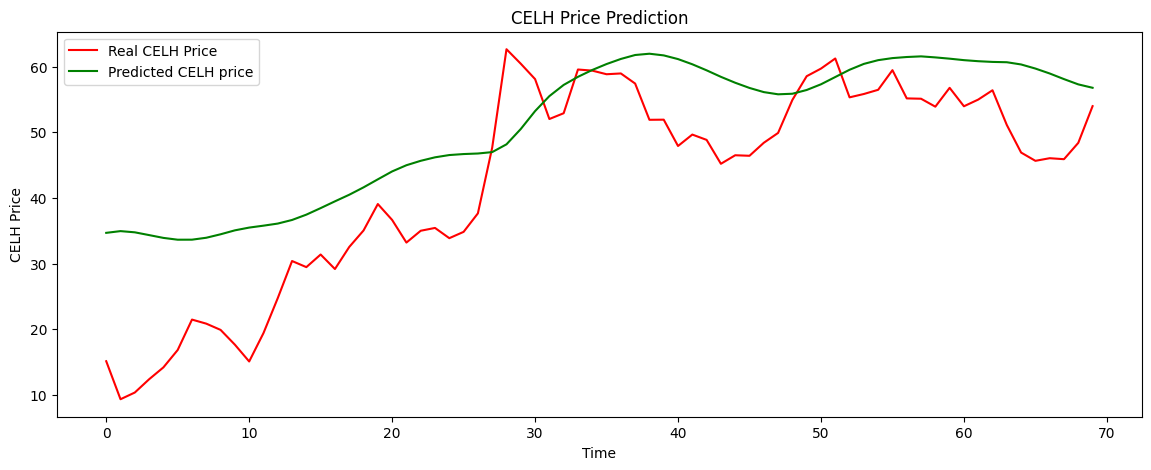

In [29]:
plt.figure(figsize = (14,5))
plt.plot(y_test[78:], color = 'red', label = 'Real CELH Price')
plt.plot(y_pred[78:], color = 'green', label = 'Predicted CELH price')
plt.title('CELH Price Prediction')
plt.xlabel('Time')
plt.ylabel('CELH Price')
plt.legend()
plt.show()

In [ ]:
for i in y_pred[1522:]:
  if y_pred[1522:] < 1.2 * y_test[1522:] & y_pred[1522:] > 0.75 * y_test[1522:]:
    print('1')
  else:
    print('0')


TypeError: ignored